In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA

# ICA

## Zad.

Wczytaj dane z EEG i narysuj wykres.

https://plot.ly/ipython-notebooks/mne-tutorial/

In [2]:
df = pd.read_csv("EEG/AG0104_filtr.csv", sep=";", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382
0,-2.700,-8.719,-10.516,-9.083,-5.927,-4.610,-6.937,-8.650,-6.282,-2.860,...,6.064,6.501,6.516,6.267,5.908,5.945,6.528,8.199,11.775,16.244
1,4.305,6.707,5.390,1.905,-0.985,-0.650,2.979,5.986,6.789,6.064,...,-2.310,-2.467,-2.325,-2.879,-4.097,-4.922,-5.066,-4.703,-3.773,-2.417
2,-32.338,-25.979,-22.705,-25.674,-28.081,-28.257,-30.271,-35.529,-37.680,-31.152,...,-1.232,-3.201,-2.402,2.120,8.749,13.168,13.743,11.719,8.637,3.487
3,-19.496,-20.407,-15.862,-13.866,-14.180,-15.927,-19.443,-23.282,-23.559,-17.704,...,1.257,-0.457,0.531,1.024,0.403,-0.203,-0.168,1.957,7.247,13.592
4,-19.563,-20.977,-16.367,-13.857,-13.588,-15.188,-19.043,-23.211,-23.585,-17.877,...,2.741,0.962,1.692,1.827,0.646,-0.489,-0.663,1.658,7.415,14.073


In [3]:
eeg = np.asarray(df)

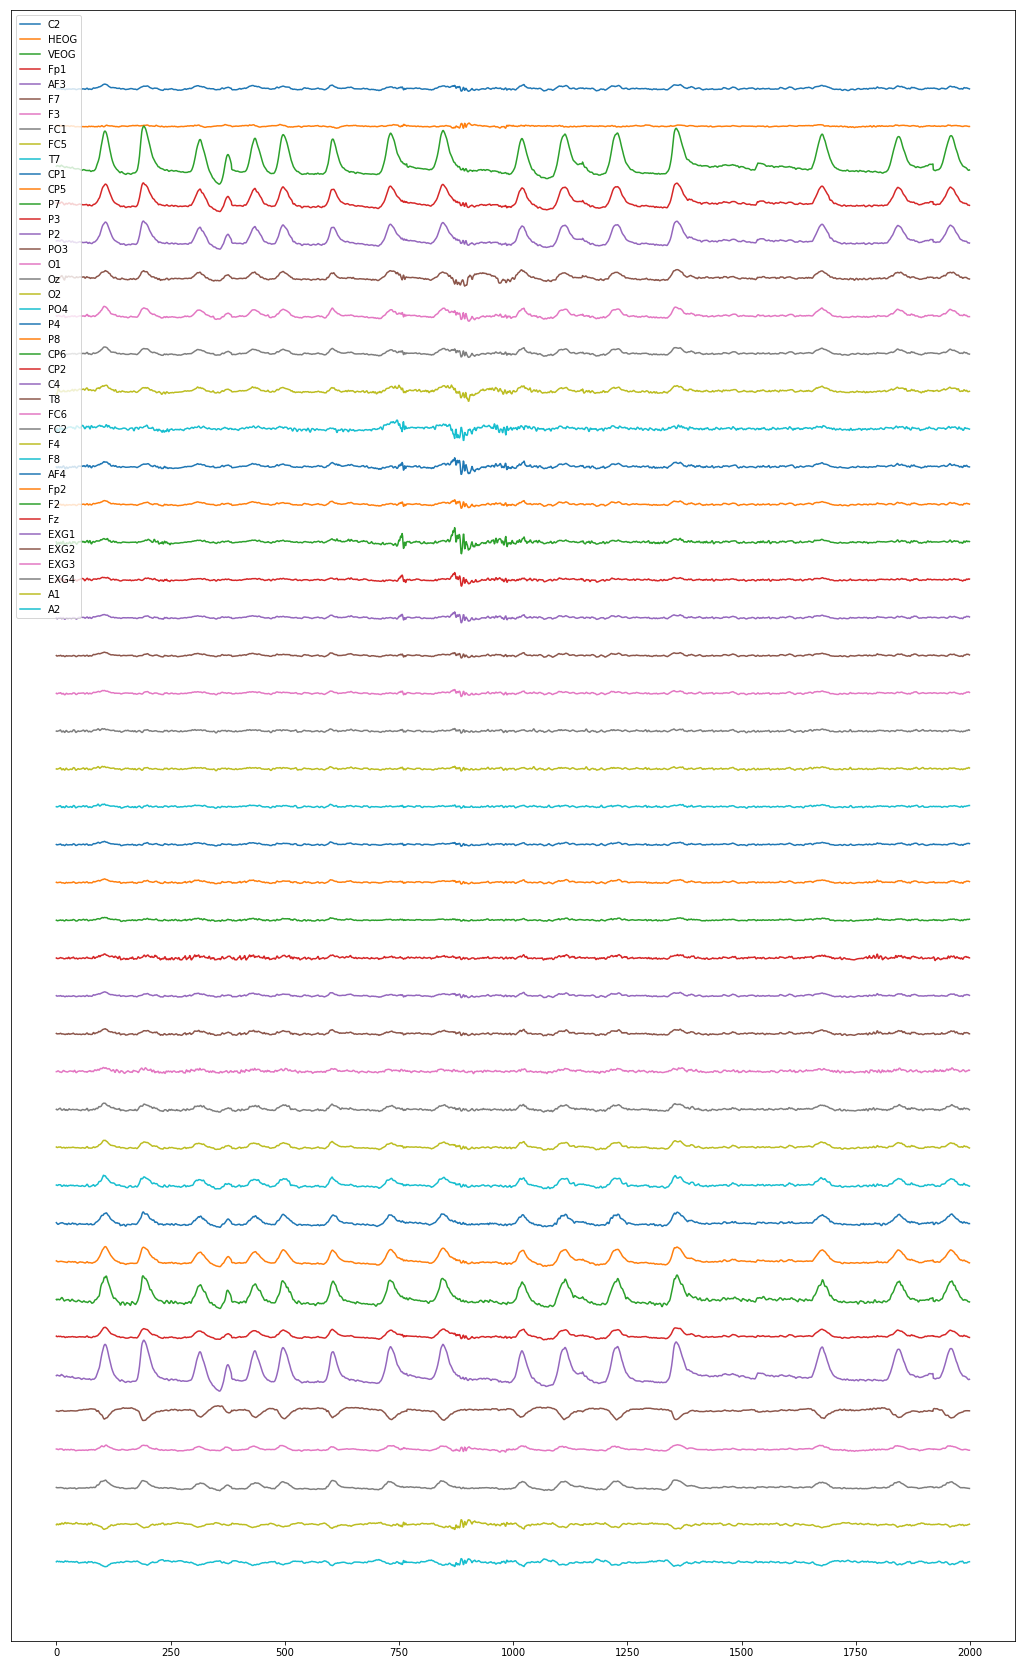

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

signals_labels = ["C2", "HEOG", "VEOG", "Fp1", "AF3", "F7", "F3", "FC1", "FC5", "T7", "CP1", "CP5", "P7", "P3",
                  "P2", "PO3", "O1", "Oz", "O2", "PO4", "P4", "P8", "CP6", "CP2", "C4", "T8", "FC6", "FC2",
                  "F4", "F8", "AF4", "Fp2", "F2", "Fz", "EXG1", "EXG2", "EXG3", "EXG4", "A1", "A2"]
 
def plot_eeg(data, scale=1, y=None):
    if y is None:
        y = range(0, data.shape[0])
    sep = np.max(np.abs(data)) / scale * np.arange(data.shape[0] - 1, -1, -1)
    fig = plt.figure(figsize=(18, 30))
    ax = fig.add_subplot(1, 1, 1)
    for i in range(0, data.shape[0]):
        # ax.plot(range(0, len(data[0])), data[i] + sep[i])
        ax.plot(range(0, 2000), data[i][:2000] + sep[i], label=y[i])
    ax.set_yticks([])

plot_eeg(eeg)
plt.legend(signals_labels)
plt.show()

# Zad.

Wykonaj Algprytm ICA.

In [5]:
eeg.shape

(40, 16383)

In [6]:
# Compute ICA
ica = FastICA(n_components=40)
S_ = ica.fit_transform(eeg.T)  # Reconstruct signals

In [7]:
S_.shape

(16383, 40)

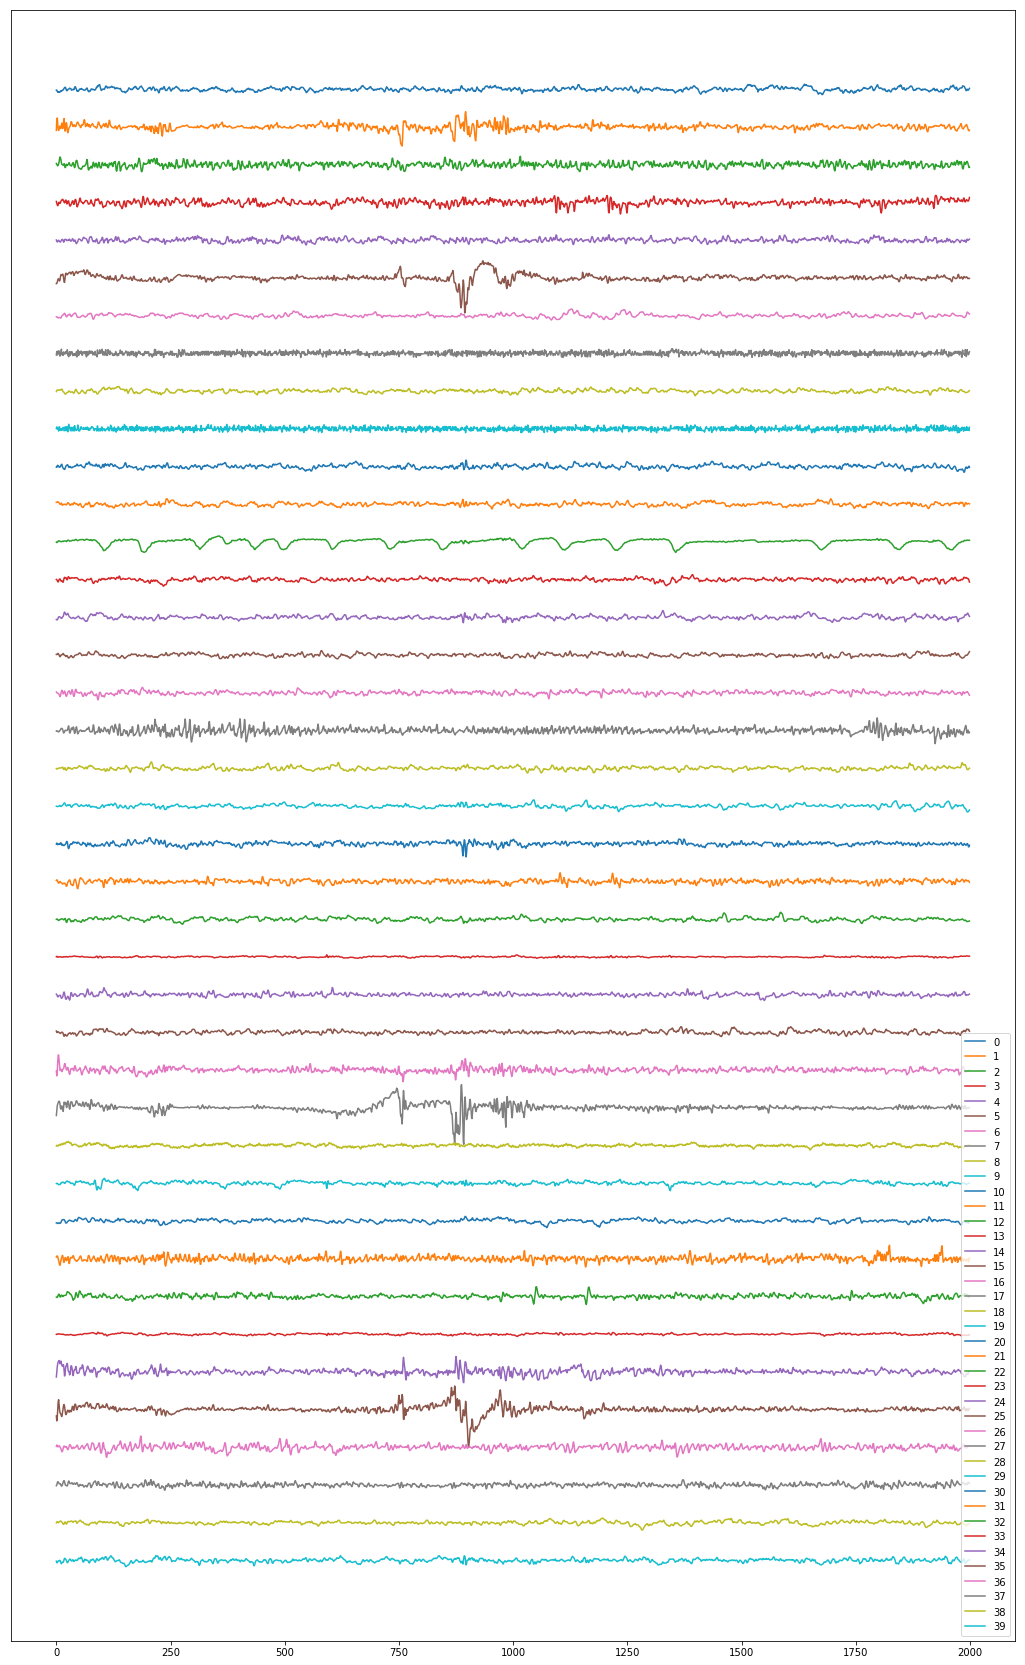

In [8]:
plot_eeg(S_.T)
plt.legend()
plt.show()

# Zad.
Wykonaj transformatę odrotną.

In [9]:
X_ = ica.inverse_transform(S_) 


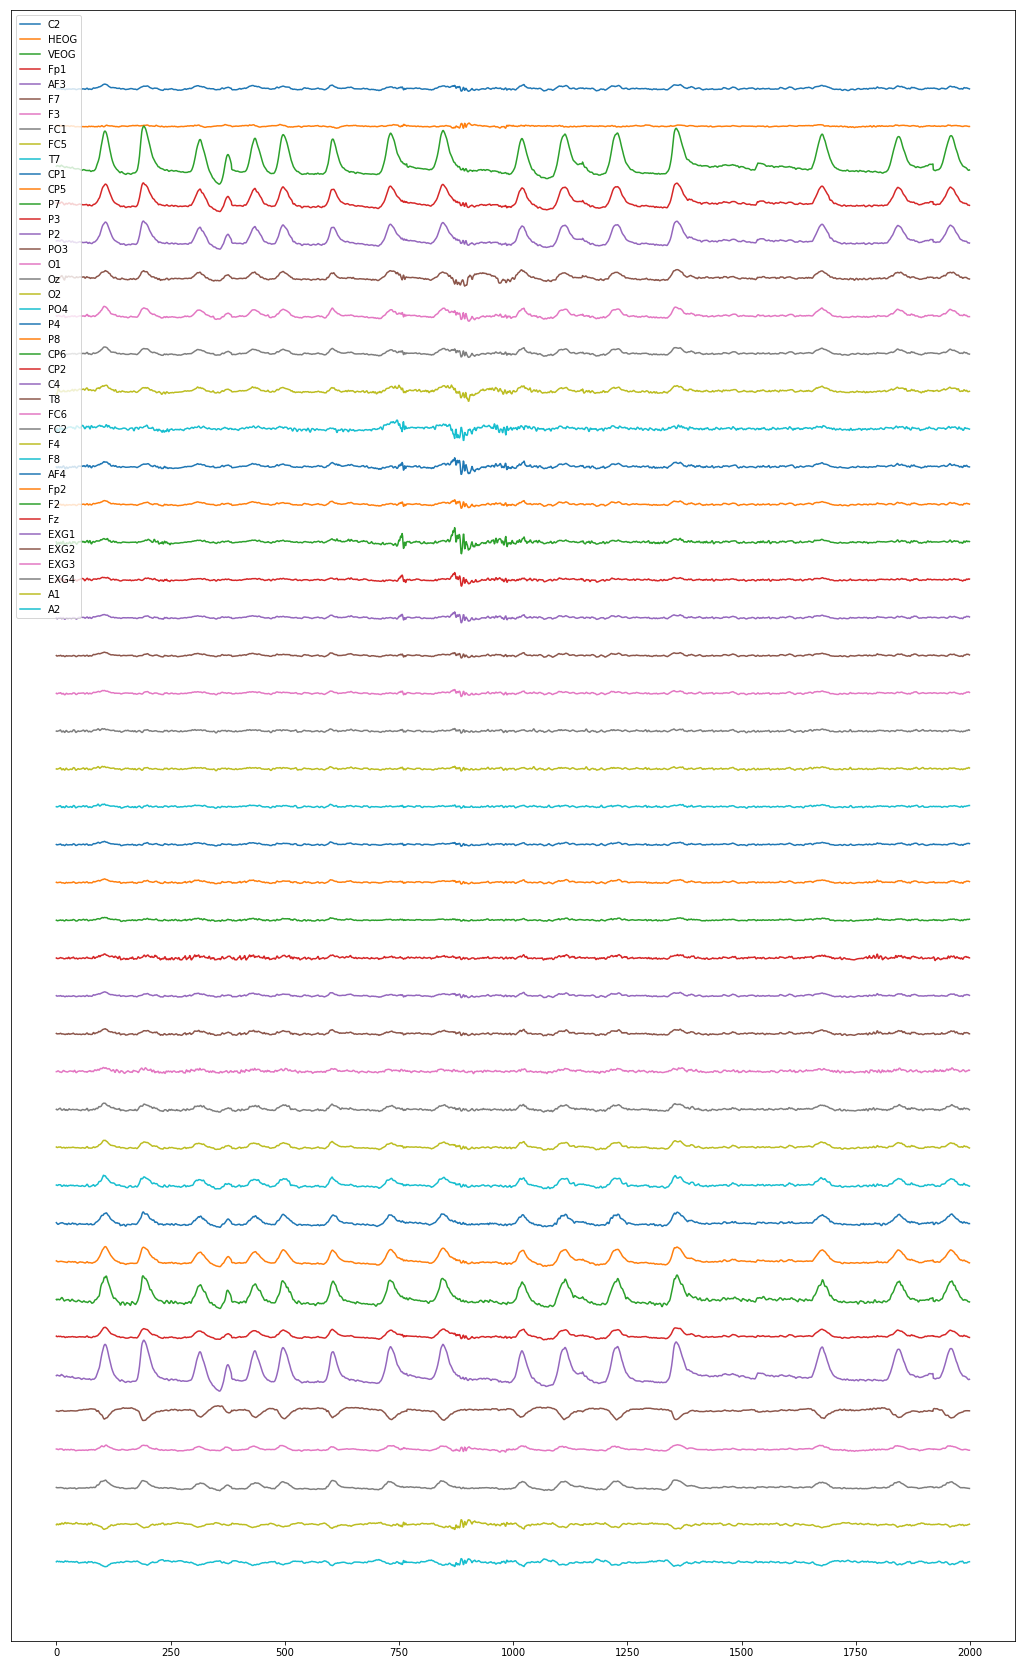

In [10]:
plot_eeg(X_.T)
plt.legend(signals_labels)
plt.show()

# Zad. 
1. Wykonaj ICA na danych z EEG
2. Znajdź komponenty odpowiadające za powtarzający się tamplate
3. Usuń wybrany komponent
4. Wykonaj transformację odwrotną

In [17]:
S_[:,12] = np.repeat(0,S_[:,12].shape[0])

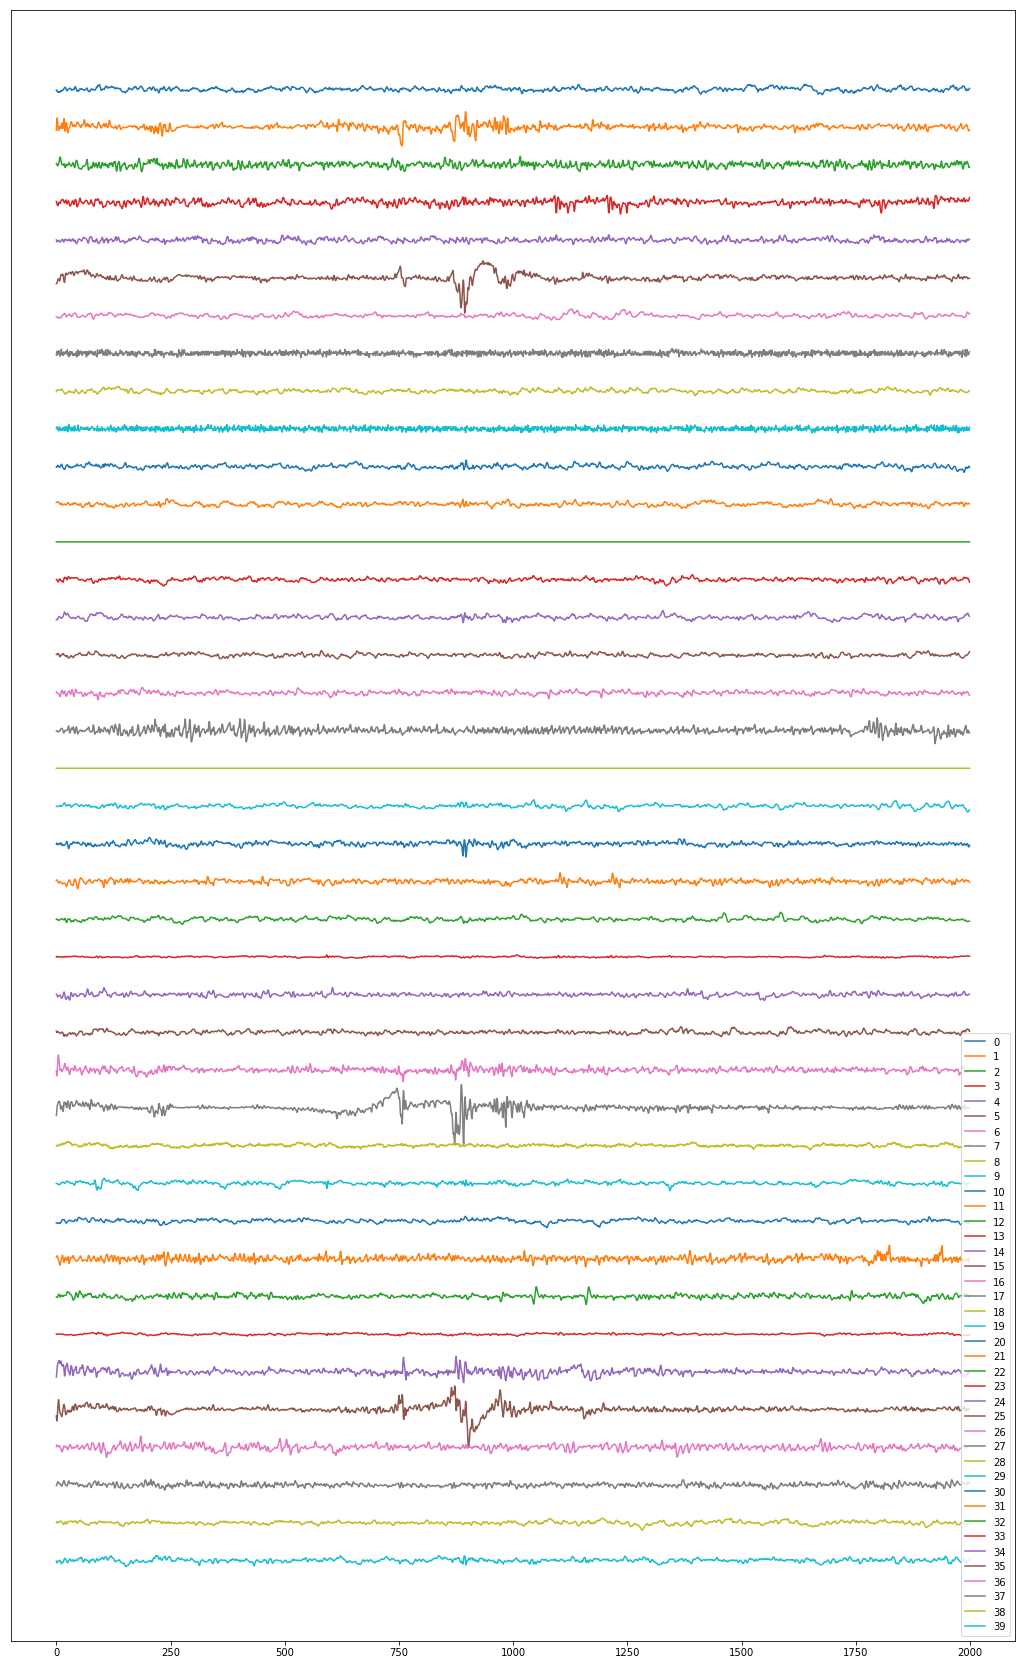

In [18]:
plot_eeg(S_.T)
plt.legend()
plt.show()

In [19]:
X_ = ica.inverse_transform(S_) 


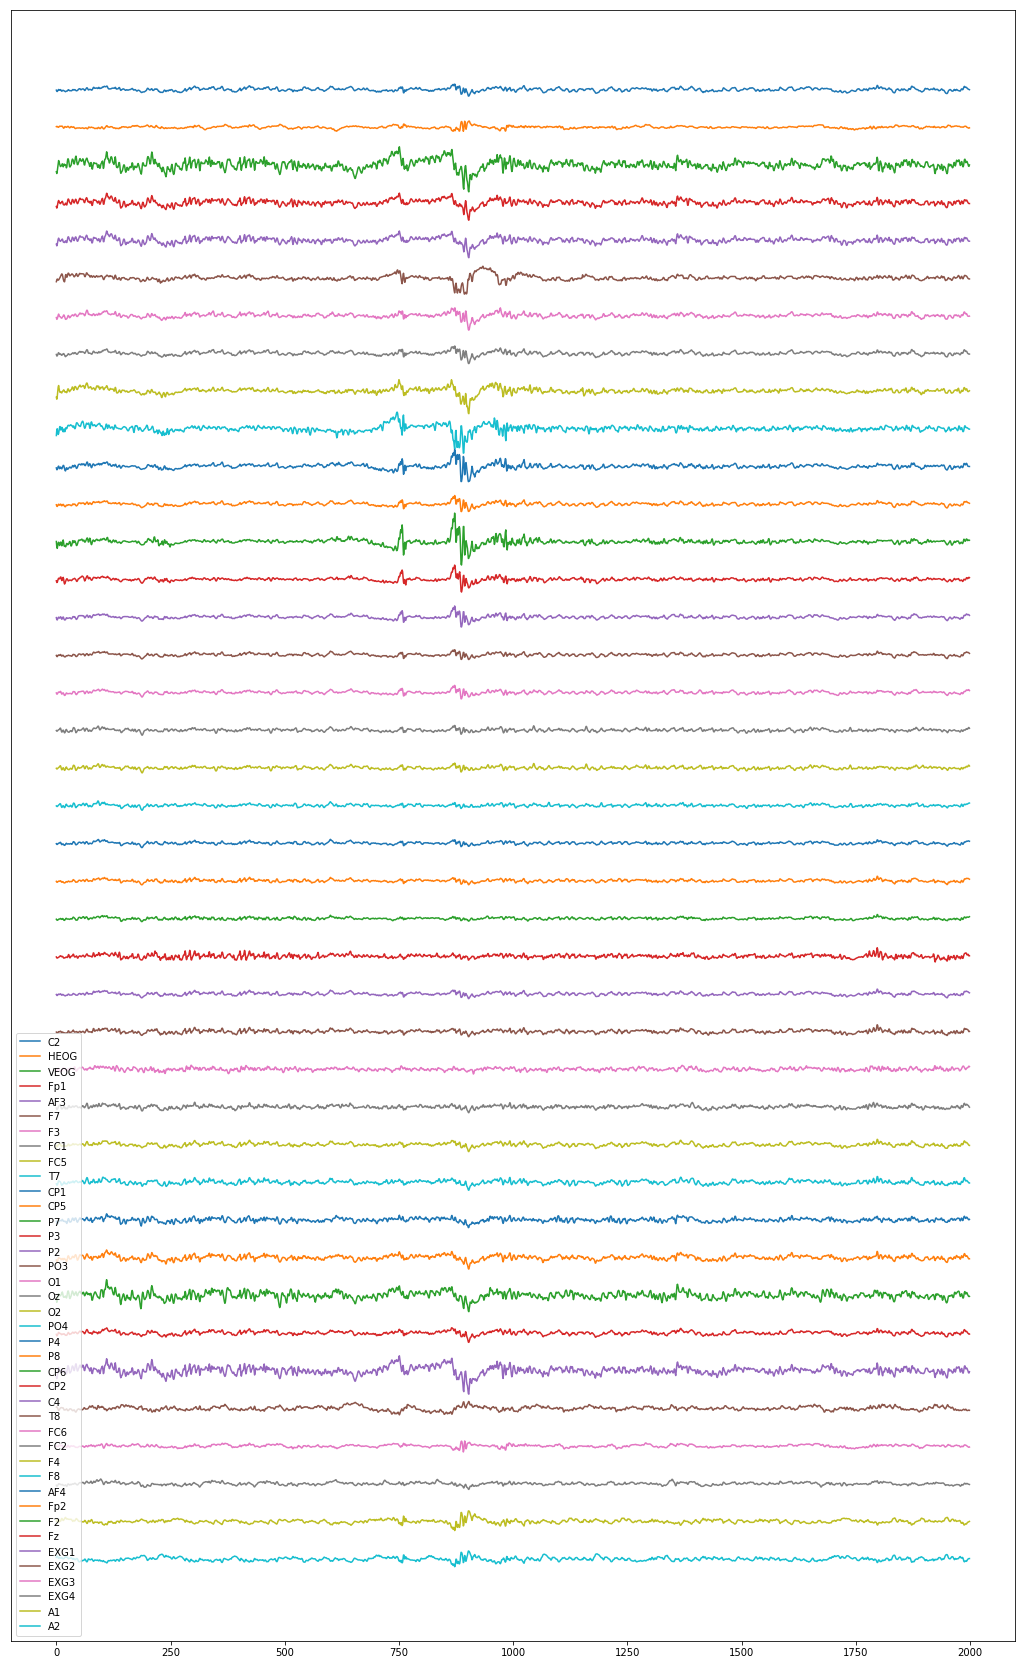

In [20]:
plot_eeg(X_.T)
plt.legend(signals_labels)
plt.show()

# Zad
Usuń komponenty odpowiadające za szum.